# Imports TensorFlow in compatibility mode for API V1

In [11]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()  # Disable TensorFlow 2 behaviors
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.set_random_seed(42)

# Generate normally distributed data for input features and target output

In [12]:
num_samples = 100
input_features = np.random.normal(0, 1, (num_samples, 1))
target_weight = 3
target_bias = 2
target_output = target_weight * input_features + np.random.normal(0, 0.5, (num_samples, 1)) + target_bias

# Define placeholders for input features and target output

In [13]:
X = tf.placeholder(tf.float32, shape=[None, 1], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')

# Define variables for weights and bias

In [14]:
W = tf.Variable(tf.random_normal([1, 1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Define the model using TensorFlow Graph

In [15]:
# Define the model
predictions = tf.add(tf.matmul(X, W), b)

# Define the Mean Squared Error (MSE) Loss Function 

In [16]:
# Define the Mean Squared Error (MSE) loss function
loss = tf.reduce_mean(tf.square(predictions - Y))

# Define the Gradient Descent optimizer

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Initialize variables

In [18]:
init = tf.global_variables_initializer()

# Train the model

In [19]:

num_epochs = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        _, current_loss = sess.run([optimizer, loss], feed_dict={X: input_features, Y: target_output})
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}, Loss: {current_loss}')
    
    # Print the trained weights and bias
    trained_weights, trained_bias = sess.run([W, b])
    print(f'Trained weights: {trained_weights}')
    print(f'Trained bias: {trained_bias}')

Epoch 100, Loss: 0.545654296875
Epoch 200, Loss: 0.23497463762760162
Epoch 300, Loss: 0.22151756286621094
Epoch 400, Loss: 0.22093454003334045
Epoch 500, Loss: 0.2209092676639557
Epoch 600, Loss: 0.22090817987918854
Epoch 700, Loss: 0.22090815007686615
Epoch 800, Loss: 0.22090812027454376
Epoch 900, Loss: 0.22090812027454376
Epoch 1000, Loss: 0.22090812027454376
Trained weights: [[2.9283636]]
Trained bias: [2.0037072]


# Plot the original target features, target output and a line using the trained weight and bias

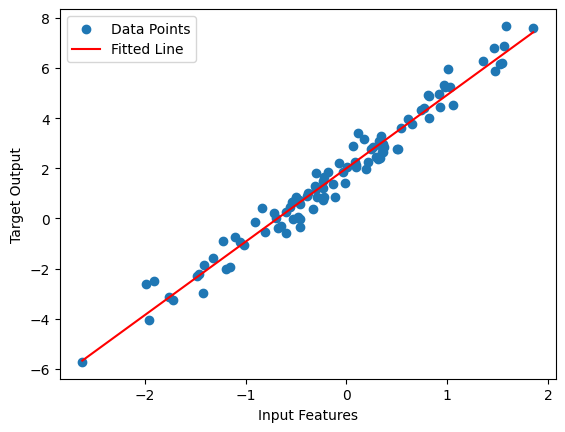

In [21]:
import matplotlib.pyplot as plt

# Plot the target features and target output
plt.scatter(input_features, target_output, label='Data Points')

# Calculate the line using the trained weights and bias
line_x = np.linspace(min(input_features), max(input_features), 100)
line_y = trained_weights[0][0] * line_x + trained_bias[0]

# Plot the line
plt.plot(line_x, line_y, color='red', label='Fitted Line')

# Add labels and legend
plt.xlabel('Input Features')
plt.ylabel('Target Output')
plt.legend()
plt.show()